In [1]:
#Import the data

import pandas as pd
online = pd.read_csv('online.csv')
print(online.dtypes)

Unnamed: 0       int64
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object


In [2]:
#How many customers are here ?

customers = online['CustomerID'].value_counts()
customers

17841    1532
14096    1055
12748     967
14606     548
15311     469
         ... 
15397       1
16338       1
13503       1
17578       1
17171       1
Name: CustomerID, Length: 3701, dtype: int64

In [3]:
#remove the time from InvoiceDate

import datetime as dt
def get_day(x): return dt.datetime(x.year,x.month,x.day)
cdate = pd.to_datetime(online['InvoiceDate'])
online['InvoiceMonth'] = cdate.apply(get_day)
online

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25
...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22


In [4]:
online['CohortMonth'] = online.groupby('CustomerID')['InvoiceMonth'].transform('min')
online

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25
...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08,2011-07-19
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09,2010-12-09
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14,2010-12-05
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22,2010-12-05


In [5]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
    
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,195
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,69
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,91
...,...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08,2011-07-19,110
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09,2010-12-09,1
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14,2010-12-05,225
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22,2010-12-05,173


In [6]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth' , columns='CohortIndex' , values = 'CustomerID')
cohort_counts



CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,69.0,3.0,1.0,NaN,3.0,5.0,2.0,4.0,4.0,2.0,...,4.0,4.0,6.0,NaN,NaN,3.0,5.0,3.0,4.0,1.0
2010-12-02,78.0,NaN,NaN,NaN,1.0,3.0,2.0,4.0,3.0,NaN,...,2.0,2.0,NaN,NaN,3.0,1.0,2.0,2.0,1.0,NaN
2010-12-03,30.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
2010-12-05,59.0,3.0,2.0,1.0,4.0,2.0,NaN,5.0,7.0,3.0,...,7.0,3.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN
2010-12-06,57.0,NaN,2.0,1.0,1.0,NaN,1.0,3.0,6.0,2.0,...,1.0,2.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-04,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-05,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,100.0,4.3,1.4,NaN,4.3,7.2,2.9,5.8,5.8,2.9,...,5.8,5.8,8.7,NaN,NaN,4.3,7.2,4.3,5.8,1.4
2010-12-02,100.0,NaN,NaN,NaN,1.3,3.8,2.6,5.1,3.8,NaN,...,2.6,2.6,NaN,NaN,3.8,1.3,2.6,2.6,1.3,NaN
2010-12-03,100.0,NaN,3.3,3.3,NaN,NaN,3.3,NaN,NaN,NaN,...,6.7,NaN,3.3,6.7,3.3,3.3,3.3,NaN,NaN,NaN
2010-12-05,100.0,5.1,3.4,1.7,6.8,3.4,NaN,8.5,11.9,5.1,...,11.9,5.1,3.4,5.1,3.4,1.7,NaN,NaN,NaN,NaN
2010-12-06,100.0,NaN,3.5,1.8,1.8,NaN,1.8,5.3,10.5,3.5,...,1.8,3.5,7.0,5.3,1.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-04,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-05,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,1.0,0.043478,0.014493,NaN,0.043478,0.072464,0.028986,0.057971,0.057971,0.028986,...,0.057971,0.057971,0.086957,NaN,NaN,0.043478,0.072464,0.043478,0.057971,0.014493
2010-12-02,1.0,NaN,NaN,NaN,0.012821,0.038462,0.025641,0.051282,0.038462,NaN,...,0.025641,0.025641,NaN,NaN,0.038462,0.012821,0.025641,0.025641,0.012821,NaN
2010-12-03,1.0,NaN,0.033333,0.033333,NaN,NaN,0.033333,NaN,NaN,NaN,...,0.066667,NaN,0.033333,0.066667,0.033333,0.033333,0.033333,NaN,NaN,NaN
2010-12-05,1.0,0.050847,0.033898,0.016949,0.067797,0.033898,NaN,0.084746,0.118644,0.050847,...,0.118644,0.050847,0.033898,0.050847,0.033898,0.016949,NaN,NaN,NaN,NaN
2010-12-06,1.0,NaN,0.035088,0.017544,0.017544,NaN,0.017544,0.052632,0.105263,0.035088,...,0.017544,0.035088,0.070175,0.052632,0.017544,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


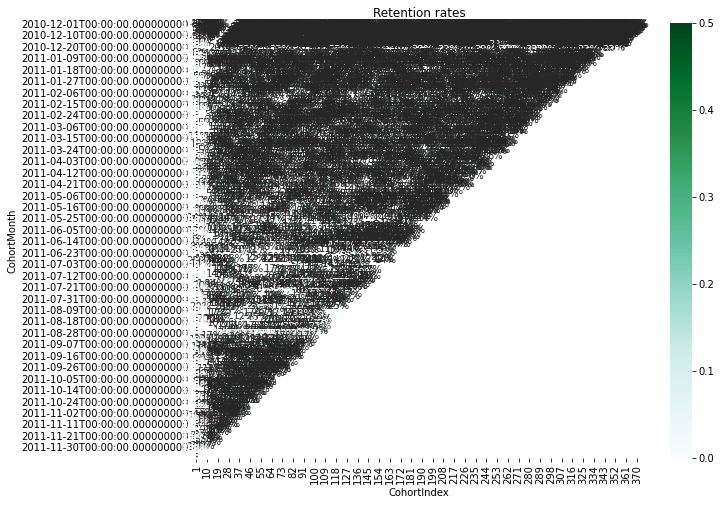

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Retention rates')

sns.heatmap(data = retention , annot = True , fmt = '.0%' ,vmin = 0.0 ,vmax = 0.5 ,cmap = 'BuGn')

plt.show()